Project testing

In [40]:
# Import necessary libraries

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from wordcloud import WordCloud





ModuleNotFoundError: No module named 'wordcloud'

In [2]:
df= pd.read_csv("C:/Users/User/OneDrive/Documents/Flatiron/Coursework/Phase 5 Capstone/FinalProject/final_project/Data/reduced_reddit.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98826 entries, 0 to 98825
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     98826 non-null  object 
 1   title         98826 non-null  object 
 2   body          80371 non-null  object 
 3   upvotes       98826 non-null  float64
 4   created_utc   98826 non-null  float64
 5   num_comments  94297 non-null  float64
 6   label         98826 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.3+ MB


subreddit           0
title               0
body            18455
upvotes             0
created_utc         0
num_comments     4529
label               0
dtype: int64

In [3]:
df.head(5)

,subreddit,title,body,upvotes,created_utc,num_comments,label
0,teenagers,Day 18 of doing 50 push-ups,NaN,4.0,1.619357e+09,4.0,0.0
1,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,1.554103e+09,NaN,0.0
2,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,1.649342e+09,12.0,0.0
3,teenagers,This isn't going to work out,NaN,236.0,1.417630e+09,33.0,0.0
4,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,1.569280e+09,4.0,0.0


In [4]:
df.describe()


,upvotes,created_utc,num_comments,label
count,98826.000000,9.882600e+04,94297.000000,98826.000000
mean,62.315555,1.566569e+09,15.217069,0.194443
std,937.347581,6.977745e+07,71.638197,0.395773
min,4.000000,1.202084e+09,1.000000,0.000000
25%,5.000000,1.552254e+09,4.000000,0.000000
50%,7.000000,1.578218e+09,7.000000,0.000000
75%,11.000000,1.611584e+09,14.000000,0.000000
max,62899.000000,1.672531e+09,7880.000000,1.000000


In [5]:
# Count unique subreddits
unique_subreddits = df['subreddit'].nunique()
print(f"Number of unique subreddits: {unique_subreddits}")

# List unique subreddits
subreddit_categories = df['subreddit'].unique()
print(f"Subreddit categories: {subreddit_categories}")


Number of unique subreddits: 5
Subreddit categories: ['teenagers' 'DeepThoughts' 'happy' 'depression' 'SuicideWatch']


In [6]:
# Convert 'created_utc' from float to readable datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [7]:
# Analyze label distribution by subreddit
label_analysis = df.groupby('subreddit')['label'].value_counts().unstack(fill_value=0)

# Show the analysis of labels by subreddit
print(label_analysis)

label           0.0    1.0
subreddit                 
DeepThoughts    364      0
SuicideWatch      0   7544
depression        0  11672
happy           995      0
teenagers     78251      0


In [8]:
df.head(5)

,subreddit,title,body,upvotes,created_utc,num_comments,label
0,teenagers,Day 18 of doing 50 push-ups,NaN,4.0,2021-04-25 13:25:39,4.0,0.0
1,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,2019-04-01 07:19:57,NaN,0.0
2,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,2022-04-07 14:35:00,12.0,0.0
3,teenagers,This isn't going to work out,NaN,236.0,2014-12-03 18:12:52,33.0,0.0
4,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,2019-09-23 23:07:59,4.0,0.0


EDA : Examples

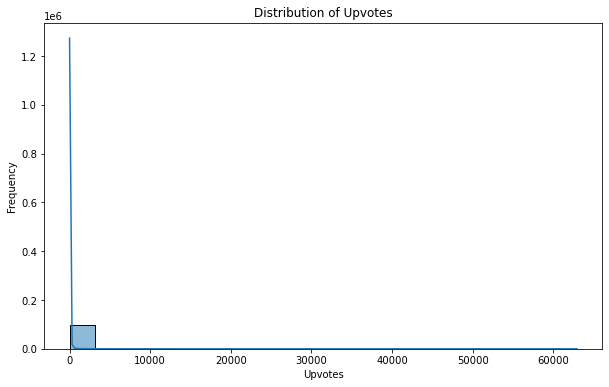

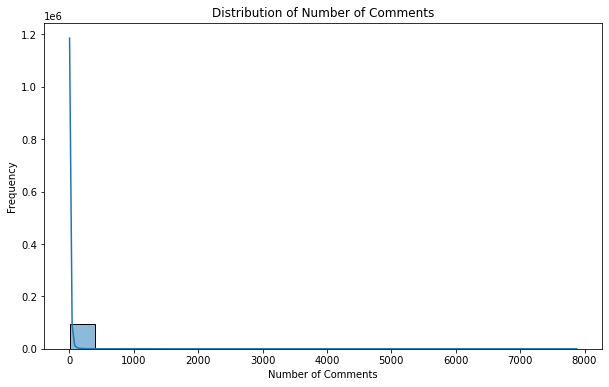

In [9]:

# Histogram of upvotes
plt.figure(figsize=(10,6))
sns.histplot(df['upvotes'], kde=True, bins=20)
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()

# Histogram of num_comments
plt.figure(figsize=(10,6))
sns.histplot(df['num_comments'], kde=True, bins=20)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


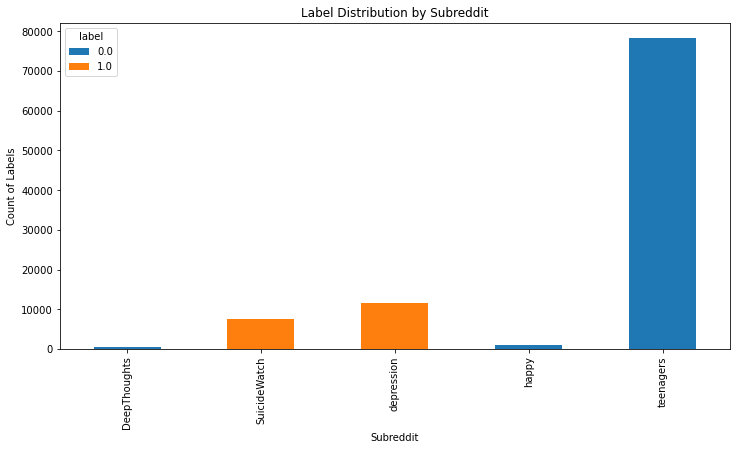

In [10]:
# Bar plot for label distribution by subreddit
label_distribution = df.groupby('subreddit')['label'].value_counts().unstack().fillna(0)
label_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Label Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count of Labels')
plt.show()


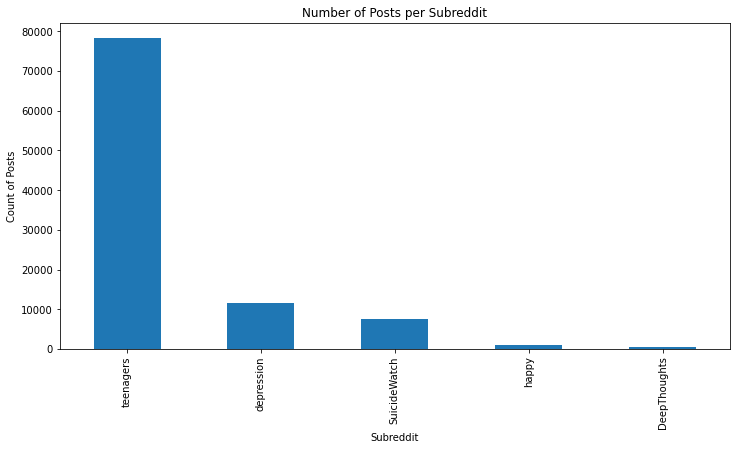

In [11]:
# Count the number of posts per subreddit
plt.figure(figsize=(12, 6))
df['subreddit'].value_counts().plot(kind='bar')
plt.title('Number of Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count of Posts')
plt.show()


### Plot number of posts over time
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.set_index('created_utc', inplace=True)

# Plot number of posts per month
df.resample('M').size().plot(figsize=(12, 6))
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


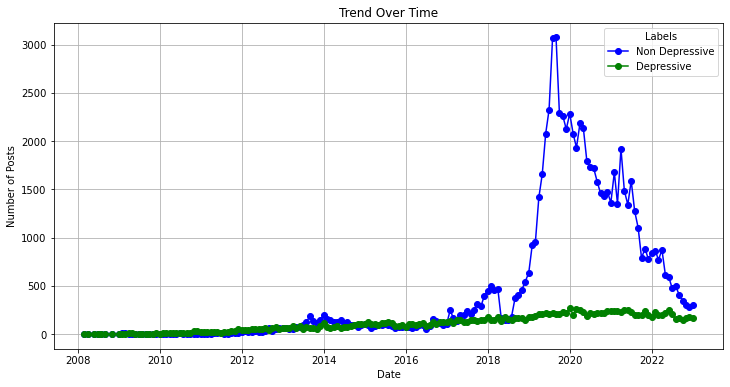

In [13]:

# Resample the data by month (change this to 'W' for weekly or 'D' for daily)
label_trend = df.resample('M')['label'].value_counts().unstack().fillna(0)

# Plot the trend over time for both labels
plt.figure(figsize=(12, 6))
plt.plot(label_trend.index, label_trend[0], label='Non Depressive', color='blue', marker='o')
plt.plot(label_trend.index, label_trend[1], label='Depressive', color='green', marker='o')

# Adding titles and labels
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Labels')
plt.grid(True)

# Show the plot
plt.show()

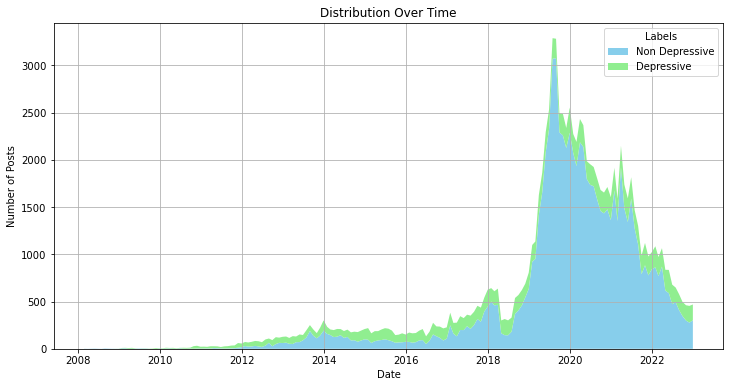

In [14]:
# Stacked area plot for label trends over time
plt.figure(figsize=(12, 6))
plt.stackplot(label_trend.index, label_trend[0], label_trend[1], labels=['Non Depressive', 'Depressive'], colors=['skyblue', 'lightgreen'])

# Adding titles and labels
plt.title('Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Labels')
plt.grid(True)

# Show the plot
plt.show()

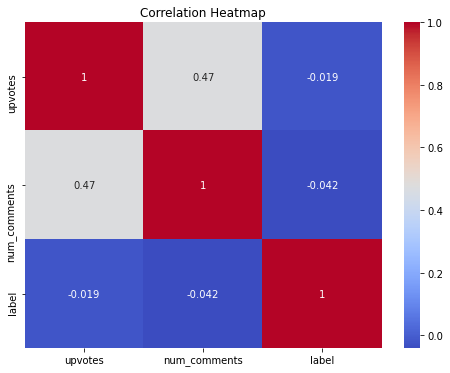

In [15]:
# Correlation heatmap between numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df[['upvotes', 'num_comments', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


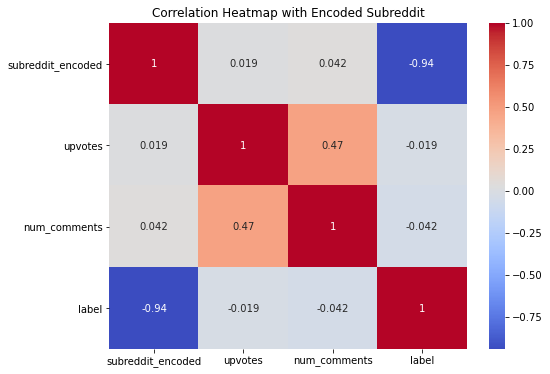

In [16]:


# Convert the 'subreddit' column to numeric using label encoding
df['subreddit_encoded'] = LabelEncoder().fit_transform(df['subreddit'])

# including the encoded 'subreddit' in the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['subreddit_encoded', 'upvotes', 'num_comments', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Subreddit')
plt.show()


API Testing


In [17]:
#import praw

# Creating a praw instance
#reddit = praw.Reddit(
    #client_id="xxx",
    #client_secret="xxx",
    #user_agent="test_script by /u/xxx",
    #username="xxx",
    #password="xxx"
#)

# Test the connection
#subreddit = reddit.subreddit("xxx")
#for post in subreddit.hot(limit=5):
 #   print(post.title)

Feature Engineering:

In [18]:
#fill in missing values in body
df['body'] = df['body'].fillna('')

# Count words
df['word_count'] = df['body'].apply(lambda x: len(x.split()))

df['char_count'] = df['body'].apply(lambda x: len(x))

df['avg_word_length'] = df['body'].apply(lambda x: np.mean([len(word) for word in x.split()]))

df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))

# Extract hour and day of week
#df['hour'] = df['created_utc'].dt.hour
#df['day_of_week'] = df['created_utc'].dt.dayofweek


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [19]:
#identify upvote to comment ratio
df['upvote_comment_ratio'] = df['upvotes'] / (df['num_comments'] + 1)

In [20]:
df.head(10)

,subreddit,title,body,upvotes,num_comments,label,subreddit_encoded,word_count,char_count,avg_word_length,title_word_count,upvote_comment_ratio
created_utc,,,,,,,,,,,,
2021-04-25 13:25:39,teenagers,Day 18 of doing 50 push-ups,,4.0,4.0,0.0,4,0,0,NaN,6,0.800000
2019-04-01 07:19:57,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,NaN,0.0,4,20,100,4.050000,20,NaN
2022-04-07 14:35:00,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,12.0,0.0,4,4,21,4.500000,16,0.307692
2014-12-03 18:12:52,teenagers,This isn't going to work out,,236.0,33.0,0.0,4,0,0,NaN,6,6.941176
2019-09-23 23:07:59,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,4.0,0.0,4,51,265,4.156863,47,1.200000
2020-04-20 13:31:02,teenagers,"Phew , close one",,11.0,NaN,0.0,4,0,0,NaN,4,NaN
2021-01-15 20:49:47,teenagers,Listen to my favorite song part 2 🤩🤩🤩,https://youtu.be/MtN1YnoL46Q,9.0,11.0,0.0,4,1,28,28.000000,8,0.750000
2021-07-11 09:53:23,teenagers,Hard core cuddling,#moans,41.0,19.0,0.0,4,1,6,6.000000,3,2.050000
2019-05-14 22:34:33,teenagers,Don't communicate with women.,I watched my friend go to high five a girl and...,7.0,11.0,0.0,4,53,261,3.943396,4,0.583333


Visualise upvote/comment ratio

In [ ]:
# Group by subreddit and calculate the mean ratio
subreddit_ratio = df.groupby('subreddit')['upvote_comment_ratio'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='subreddit', y='upvote_comment_ratio', data=subreddit_ratio, palette='viridis')
plt.title('Average Upvote-to-Comment Ratio by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Upvote/Comment Ratio')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create a day of the week column
df['day_of_week'] = df['created_utc'].dt.dayofweek

# Pivot the data to get the mean ratio per subreddit per day
ratio_pivot = df.pivot_table(index='subreddit', columns='day_of_week', values='upvote_comment_ratio', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(ratio_pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Upvote-to-Comment Ratio by Subreddit and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Subreddit')
plt.show()

data preprocessing


In [21]:

# Ensure you have the necessary nltk data downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Define a class TextPreprocessor that conforms to scikit-learn’s transformer API
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))  # Initialize stop words
        self.lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer

    def fit(self, X, y=None):
        return self  # No fitting required for this transformer

    def transform(self, X, y=None):
        return X.apply(self.preprocess_text)  # Apply preprocessing to each row

    def preprocess_text(self, text):
        if pd.isnull(text):
            return ''  # Return empty string for missing values
        text = text.lower()  # Lowercase
        text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize
        tokens = [word for word in tokens if word not in self.stop_words]  # Remove stopwords
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
        return ' '.join(tokens)  # Join tokens back into string

# Instantiate TextPreprocessor
text_preprocessor = TextPreprocessor()

# Apply the text preprocessor to 'title' and 'body' columns
df['cleaned_title'] = text_preprocessor.transform(df['title'])
df['cleaned_body'] = text_preprocessor.transform(df['body'])

# Display the processed data
df[['cleaned_title', 'cleaned_body']]


,cleaned_title,cleaned_body
created_utc,,
2021-04-25 13:25:39,day 18 50 pushup,
2019-04-01 07:19:57,’ better feeling finishing science paper 1am d...,teacher hit “ good job everyone draft final co...
2022-04-07 14:35:00,lmaooo get guy talk talk god💖💖,yeahhh maybe babe
2014-12-03 18:12:52,isnt going work,
2019-09-23 23:07:59,guy found hurtful child movie kid female chara...,like funny deserve better male character kick ...
...,...,...
2019-05-17 08:30:19,anyone ever problem gang,dont care grammer isnt good dont even bring se...
2012-10-20 17:24:21,moment away killing even bothering make throw ...,dont want talk problem dont want talk problem ...
2015-05-19 22:19:26,ive grown used like year,im suicidal moment fact feel great right time ...


In [22]:
# Combine the cleaned title and body as both may be important
df['combined_text'] = df['cleaned_title'] + ' ' + df['cleaned_body']

In [23]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features

# Fit and transform the combined text
X = vectorizer.fit_transform(df['combined_text'])
y = df['label']  # Assuming 'label' is 1 for depression/suicidewatch posts and 0 for others

In [24]:
#review Bag of words for common terms 
#vectorizer = CountVectorizer()
#X_bow = vectorizer.fit_transform(df['body'])

Logistic regression baseline model

In [25]:
#Set up Logistic regression model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     15998
         1.0       0.88      0.75      0.81      3768

    accuracy                           0.93     19766
   macro avg       0.91      0.86      0.88     19766
weighted avg       0.93      0.93      0.93     19766



Naive Bayes Model

In [26]:
#naivebayes

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9078215116867348
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     15998
         1.0       0.91      0.57      0.70      3768

    accuracy                           0.91     19766
   macro avg       0.91      0.78      0.82     19766
weighted avg       0.91      0.91      0.90     19766



SVM model

In [27]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1)  # Start with linear kernel

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9334210260042497
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     15998
         1.0       0.87      0.77      0.81      3768

    accuracy                           0.93     19766
   macro avg       0.91      0.87      0.89     19766
weighted avg       0.93      0.93      0.93     19766



Class Balance review

0.0    79610
1.0    19216
Name: label, dtype: int64
0.0    80.555724
1.0    19.444276
Name: label, dtype: float64
Class Imbalance Ratio: 4.14


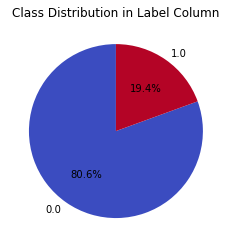

In [28]:
# Check class balance
print(df['label'].value_counts())

# Check percentage distribution of classes
print(df['label'].value_counts(normalize=True) * 100)

# Check ratio of majority to minority class
class_counts = df['label'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f'Class Imbalance Ratio: {imbalance_ratio:.2f}')

# Plot a pie chart of the class distribution
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Class Distribution in Label Column')
plt.ylabel('')  # Remove y-axis label
plt.show()

Balance the data using SMOTE

In [29]:
# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Hyperparameter tuning for Logistic Regression

In [30]:
# Define the parameters you want to tune
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'solver': ['lbfgs', 'liblinear']  # Different solvers for logistic regression
}

# Initialize Grid Search with 5-fold cross-validation
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Cross-validation Accuracy for Logistic Regression:", grid_search_lr.best_score_)

# Evaluate the best model on the test set
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
print("Test Accuracy with Best Logistic Regression Model:", accuracy_score(y_test, y_pred_best_lr))

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Cross-validation Accuracy for Logistic Regression: 0.9292942069314444
Test Accuracy with Best Logistic Regression Model: 0.9337751694829505


Hyper parameter tuning for Naive Bayes

In [31]:

# Define the parameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0]  # Add more values if necessary
}

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'alpha': 0.1}
Best Cross-validation Accuracy: 0.9043764229698963
Test Accuracy with Best Model: 0.9082768390164929


Hyperparameter tuning for SVM

In [32]:
# Define the parameters you want to tune
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear'],  # Linear, Radial Basis Function, Polynomial
    #'gamma': ['scale', 'auto'],  # Only matters for 'rbf' or 'poly' kernels
}

# Initialize Grid Search with 5-fold cross-validation
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-validation Accuracy for SVM:", grid_search_svm.best_score_)

# Evaluate the best model on the test set
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)
print("Test Accuracy with Best SVM Model:", accuracy_score(y_test, y_pred_best_svm))
print(classification_report(y_test, y_pred_best_svm))

KeyboardInterrupt: 

Sentiment analysis

In [33]:

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER to calculate sentiment scores
df['vader_sentiment'] = df['body'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment based on compound score
df['predicted_sentiment'] = df['vader_sentiment'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
df.head(5)

,subreddit,title,body,upvotes,num_comments,label,subreddit_encoded,word_count,char_count,avg_word_length,title_word_count,upvote_comment_ratio,cleaned_title,cleaned_body,combined_text,vader_sentiment,predicted_sentiment
created_utc,,,,,,,,,,,,,,,,,
2021-04-25 13:25:39,teenagers,Day 18 of doing 50 push-ups,,4.0,4.0,0.0,4,0,0,NaN,6,0.800000,day 18 50 pushup,,day 18 50 pushup,0.0000,0
2019-04-01 07:19:57,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,NaN,0.0,4,20,100,4.050000,20,NaN,’ better feeling finishing science paper 1am d...,teacher hit “ good job everyone draft final co...,’ better feeling finishing science paper 1am d...,0.4404,1
2022-04-07 14:35:00,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,12.0,0.0,4,4,21,4.500000,16,0.307692,lmaooo get guy talk talk god💖💖,yeahhh maybe babe,lmaooo get guy talk talk god💖💖 yeahhh maybe babe,0.0000,0
2014-12-03 18:12:52,teenagers,This isn't going to work out,,236.0,33.0,0.0,4,0,0,NaN,6,6.941176,isnt going work,,isnt going work,0.0000,0
2019-09-23 23:07:59,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,4.0,0.0,4,51,265,4.156863,47,1.200000,guy found hurtful child movie kid female chara...,like funny deserve better male character kick ...,guy found hurtful child movie kid female chara...,-0.6865,0


In [ ]:
df.head (5)

,subreddit,title,body,upvotes,num_comments,label,subreddit_encoded,word_count,char_count,avg_word_length,title_word_count,combined_text
created_utc,,,,,,,,,,,,
2021-04-25 13:25:39,teenagers,Day 18 of doing 50 push-ups,,4.0,4.0,0.0,4,0,0,NaN,6,Day 18 of doing 50 push-ups
2019-04-01 07:19:57,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,NaN,0.0,4,20,100,4.050000,20,There isn’t a better feeling than finishing yo...
2022-04-07 14:35:00,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,12.0,0.0,4,4,21,4.500000,16,LMAOOO I can only get this guy to talk to me i...
2014-12-03 18:12:52,teenagers,This isn't going to work out,,236.0,33.0,0.0,4,0,0,NaN,6,This isn't going to work out
2019-09-23 23:07:59,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,4.0,0.0,4,51,265,4.156863,47,Am I the only guy who found it hurtful as a ch...


Visualising the sentiments

In [41]:

# Plot the counts of each category
plt.figure(figsize=(8,6))
sns.countplot(x='vader_sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

KeyboardInterrupt: 

In [ ]:

# Group by date and calculate average sentiment
df_daily_sentiment = df.groupby(df['date'].dt.date)['compound'].mean()

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(df_daily_sentiment.index, df_daily_sentiment.values, marker='o', linestyle='-')
plt.title('Daily Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:

# Generate word clouds for positive and negative sentiment
positive_text = ' '.join(df[df['compound'] >= 0.05]['cleaned_body'])
negative_text = ' '.join(df[df['compound'] <= -0.05]['cleaned_body'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.show()


In [ ]:
#Boxplot of sentiment by subreddit
plt.figure(figsize=(12,6))
sns.boxplot(x='subreddit', y='compound', data=df, palette='coolwarm')
plt.title('Sentiment Scores by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#violinplot of sentiment by subreddit
plt.figure(figsize=(12,6))
sns.violinplot(x='subreddit', y='compound', data=df, palette='coolwarm')
plt.title('Sentiment Distribution Across Subreddits (Violin Plot)')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.show()